In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.rcParams['figure.figsize'] = 8,4
sns.set(style="white")
random_state = np.random.RandomState(10)
%matplotlib inline

In [2]:
cd = pd.read_csv("/Users/amit/data/FyntraCustomerData.csv")

In [3]:
cd.dtypes

Email                    object
Address                  object
Avatar                   object
Avg_Session_Length      float64
Time_on_App             float64
Time_on_Website         float64
Length_of_Membership    float64
Yearly_Amount_Spent     float64
dtype: object

In [4]:
def getState(address):
    return address.split('\n')[1].split(',')[-1].split()[-2]
def rounded(age):
    
    
    return int(np.floor(age))

In [5]:
cd['state'] = cd['Address'].apply(getState)
cd['Length_of_Membership_Rounded'] = cd['Length_of_Membership'].apply(rounded)
cd['Time_on_App_Rounded'] = cd['Time_on_App'].apply(rounded)

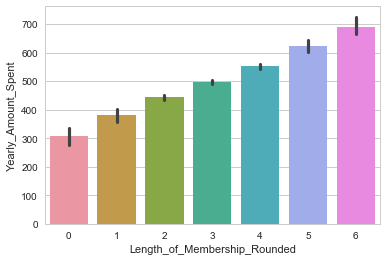

In [6]:
sns.set_style("whitegrid")
example_one = sns.barplot(x="Length_of_Membership_Rounded", y="Yearly_Amount_Spent", data = cd)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

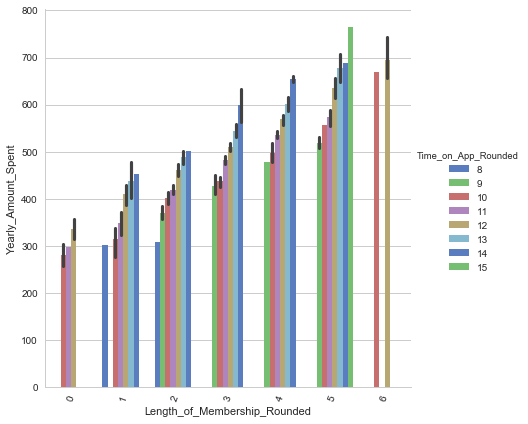

In [7]:
example_two = sns.factorplot(x="Length_of_Membership_Rounded", y="Yearly_Amount_Spent", hue="Time_on_App_Rounded",
                            data = cd, size=6, kind = "bar", palette="muted")
plt.xticks(rotation=70)

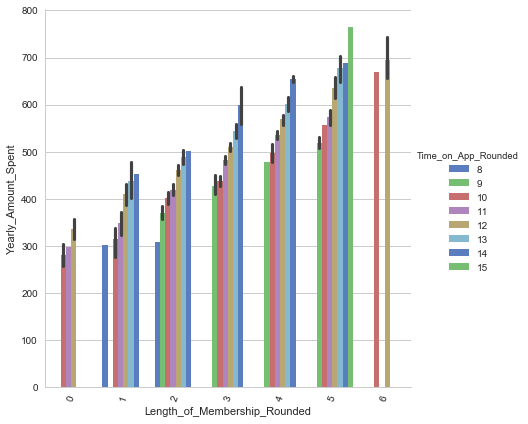

In [8]:
example_two = sns.factorplot(x="Length_of_Membership_Rounded", y="Yearly_Amount_Spent", hue="Time_on_App_Rounded",
                            data = cd, size=6, kind = "bar", palette="muted")
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"] = 9

### Joint Kernel Density

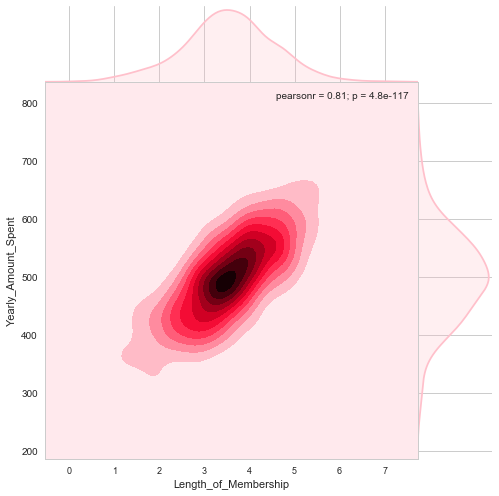

In [109]:
example_three = sns.jointplot(cd.Length_of_Membership, cd.Yearly_Amount_Spent, 
                              kind = "kde", size = 7, space = 0, color="pink")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


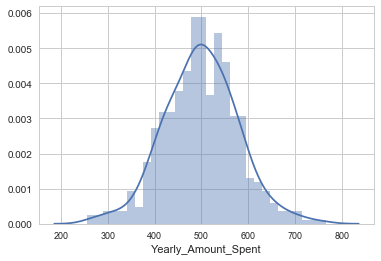

In [12]:
vis5 = sns.distplot(cd['Yearly_Amount_Spent'], bins = 30)

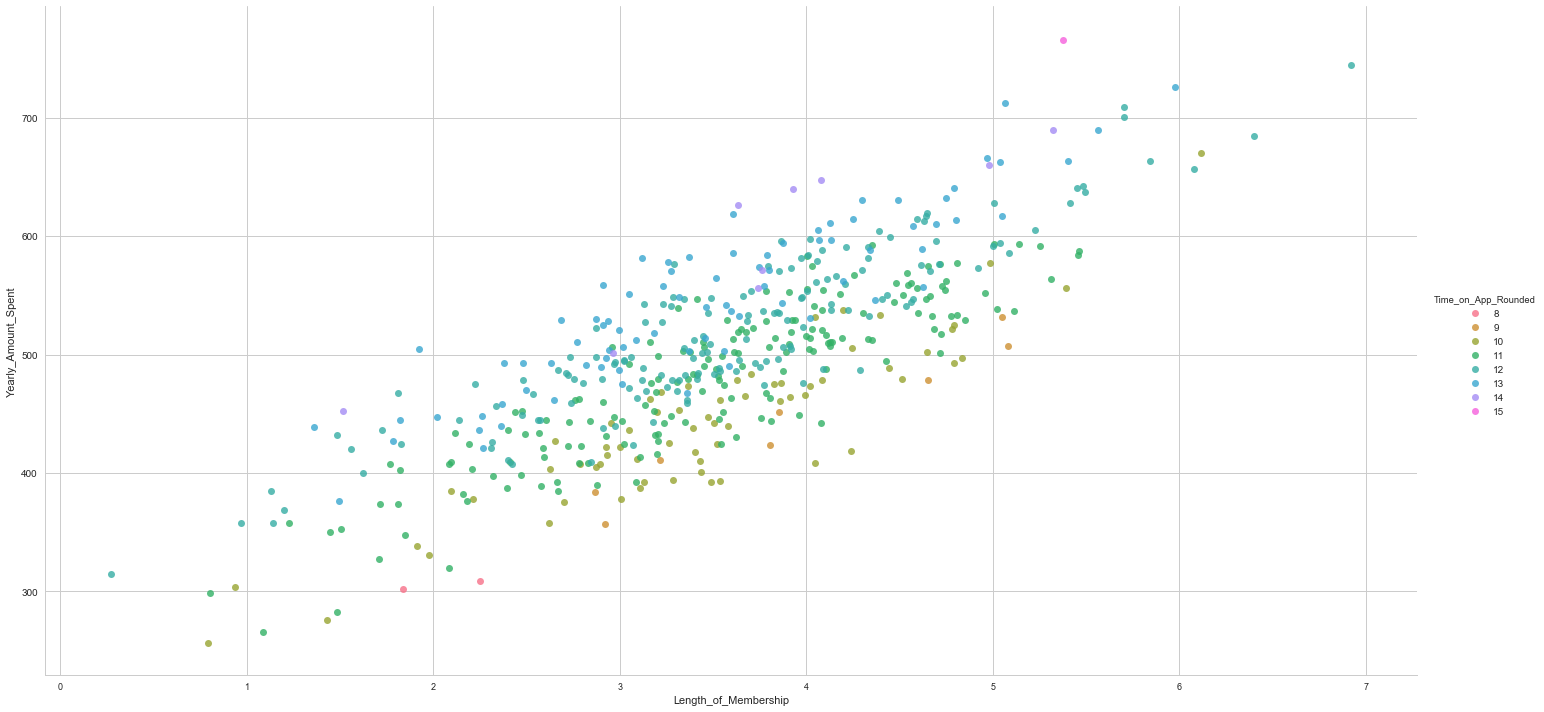

In [17]:
vis6 = sns.lmplot(data = cd, x = "Length_of_Membership", y = "Yearly_Amount_Spent", 
                 fit_reg = False, hue = 'Time_on_App_Rounded', size = 10, aspect=2)

#Size is not controlled by global parameter

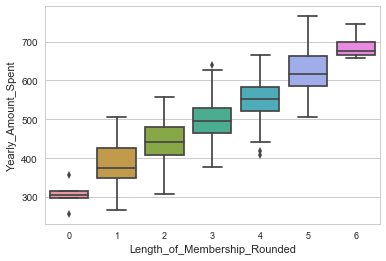

In [14]:
#Boxplots:
vis7= sns.boxplot(data=cd, x = "Length_of_Membership_Rounded", y="Yearly_Amount_Spent")

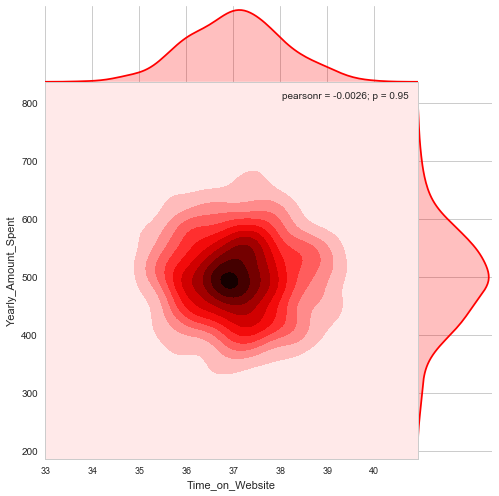

In [19]:
#Q1
Q1 = sns.jointplot(cd.Time_on_Website, cd.Yearly_Amount_Spent, 
                              kind = "kde", size = 7, space = 0, color="r")

In [22]:
# Seems there is no correlation

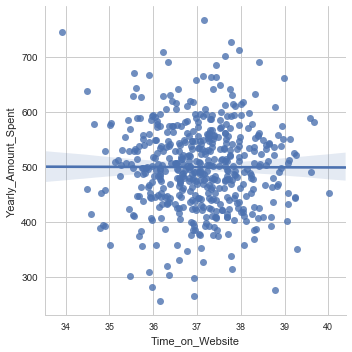

In [21]:
vis4 = sns.lmplot(data = cd, x = "Time_on_Website", y = "Yearly_Amount_Spent", fit_reg=True)

In [23]:
cd.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent',
       'state', 'Length_of_Membership_Rounded', 'Time_on_App_Rounded'],
      dtype='object')

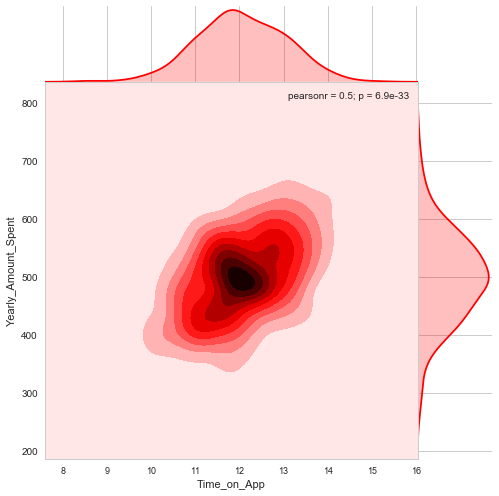

In [24]:
Q2 = sns.jointplot(cd.Time_on_App, cd.Yearly_Amount_Spent, 
                              kind = "kde", size = 7, space = 0, color="r")

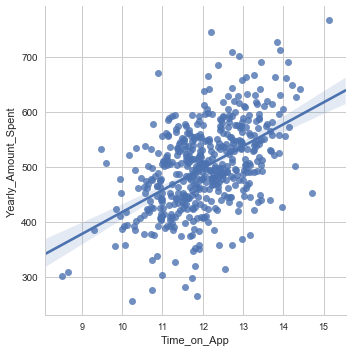

In [25]:
vis4 = sns.lmplot(data = cd, x = "Time_on_App", y = "Yearly_Amount_Spent", fit_reg=True)

In [26]:
# Yes, it has more correlation than the first one. 

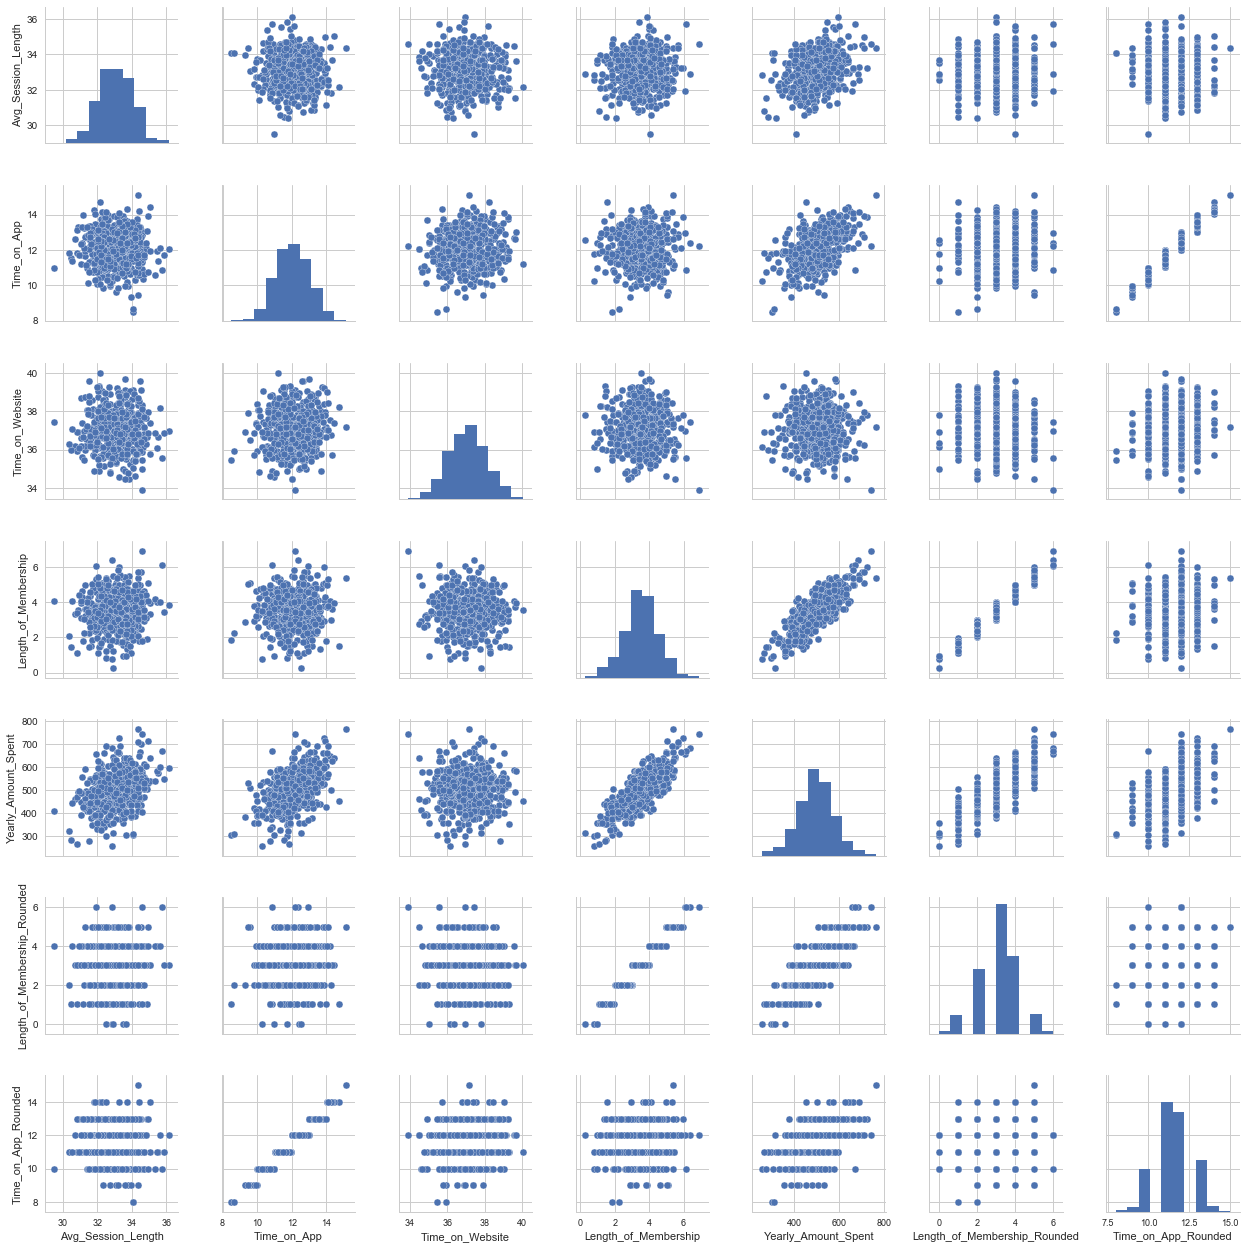

In [28]:
sns.pairplot(data=cd)

### Q3
Length_of_Membership is most correlated to Yearly Amount Spent

### Q4

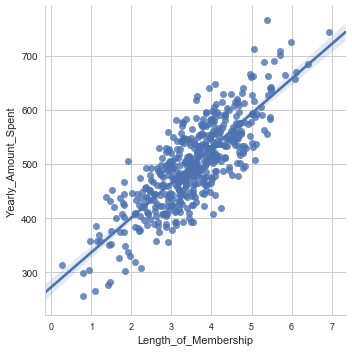

In [29]:
# Linear Model Plot
vis3 = sns.lmplot(data = cd, x = "Length_of_Membership", y = "Yearly_Amount_Spent")

### Yes, this data is fitting well in linear model. 

In [30]:
from sklearn.model_selection import train_test_split

In [56]:
X = cd.loc[:, dataType.isin([np.float64])].drop(['Yearly_Amount_Spent'], axis =1)
y = cd['Yearly_Amount_Spent']

In [66]:
###Q5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 85)

In [64]:
# Random state gives convinience to replicate the split in future

In [65]:
len(X_train), len(X_test)

(400, 100)

In [67]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
y_pred = lm.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error of the model is: {mean_squared_error(y_test, y_pred): 0.02f}")

Mean Squared Error of the model is:  95.04


In [83]:
lm.coef_

array([25.94725163, 39.06682064,  0.68253009, 61.33469418])

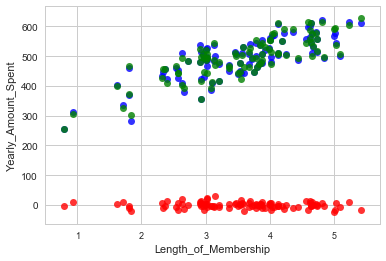

In [103]:
sns.regplot(x = X_test['Length_of_Membership'], y = y_pred, fit_reg=False, color='b')
sns.regplot(x = X_test['Length_of_Membership'], y = y_test, fit_reg=False, color='g')
sns.regplot(x = X_test['Length_of_Membership'], y = (y_pred - y_test), fit_reg=False, color='r')

In [104]:
lm.coef_

array([25.94725163, 39.06682064,  0.68253009, 61.33469418])

In [105]:
X.columns

Index(['Avg_Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership'],
      dtype='object')

### 7
Root Mean Squared Error is the way of recording error in y_test and y_pred. <br>
sqrt(sum((y_test - y_pred)(y_test - y_pred)))


### 8
Based on coefficient, company should focus on mobile app